## Import libraries and packages

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tseries.offsets import Week
import seaborn as sns
import datetime as dt
import warnings
import time
# import matplotlib.ticker as tkr
# from scipy import stats
# from statsmodels.tsa.stattools import adfuller
# from sklearn import preprocessing
# from statsmodels.tsa.stattools import pacf
import math
# import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import *
# from keras.layers.merge import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping
# import pydot_ng as pydot
import yfinance as yf

## Set libraries settings

In [2]:
'''
to dislay the visualization in the "Out" part of Jupyter notebook
'''
%matplotlib inline
'''
values in dataframe will be with a precision of 4 decimal places 
'''
pd.set_option('display.float_format', lambda x: '%.4f' % x)

'''
seaborn visualization are set with preconfigured values(paper)
visualizations will have a dark background and the grid is visible
visualizations sized will be 12 by 6
'''
sns.set_context("paper", font_scale=1.5) 
sns.set_style('darkgrid')
sns.set_style(rc={"figsize":(13,10)})
FIG_SIZE = (13,10)

'''
remove all warnings from packages and libraries to have a clean notebook
'''
warnings.filterwarnings('ignore')

## Fetch data from Yahoo Finance

In [3]:
'''
Set the start, end date and ticker
fetch data with the specified parameters
'''
start_date = '2000-01-01'
end_date = '2022-03-03'
ticker = 'TSCO.L'
data = yf.download(ticker, start_date, end_date, interval="1d")


[*********************100%***********************]  1 of 1 completed


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-24,285.8500,287.3500,278.8500,279.6500,271.5579,24807025
2022-02-25,280.3000,288.4000,279.2000,286.5500,278.2582,22322138
2022-02-28,285.2500,289.9500,283.1000,289.7500,281.3657,28809655
2022-03-01,289.3500,293.6400,283.9500,283.9500,275.7335,22462044
2022-03-02,283.6500,286.8500,277.4800,282.6500,274.4711,34519806


## some

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5652 entries, 1999-12-31 to 2022-03-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5652 non-null   float64
 1   High       5652 non-null   float64
 2   Low        5652 non-null   float64
 3   Close      5652 non-null   float64
 4   Adj Close  5652 non-null   float64
 5   Volume     5652 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 309.1 KB


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5652.0000,5652.0000,5652.0000,5652.0000,5652.0000,5652.0000
mean,359.6518,363.6414,355.4622,359.5072,218.9057,22037610.6265
std,106.7194,107.3952,105.9226,106.6378,62.6430,13622882.4054
min,175.5599,177.2065,173.5332,176.3199,89.1537,0.0000
25%,271.9532,275.8165,268.5015,272.0798,161.6634,13657580.2500
50%,323.1518,326.7998,319.6571,323.6332,215.8833,19131929.0000
75%,450.9331,456.4114,444.8531,451.0598,272.3557,27083106.2500
max,624.4664,626.0497,614.3330,623.1997,341.9339,196797325.0000


## Discretization

In [7]:
tags = []
for i in data['Close']:
    if i > 100 and i< 200:
        tag = 100
    elif i > 200 and i < 300:
        tag = 200
    elif i > 300 and i < 400:
        tag = 300
    elif i > 400 and i < 500:
        tag = 400
    elif i > 500 and i < 600:
        tag = 500
    elif i > 600:
        tag = 600
    tags.append(tag)

In [15]:
data['Discrete_close'] = tags

<AxesSubplot:xlabel='Discrete_close'>

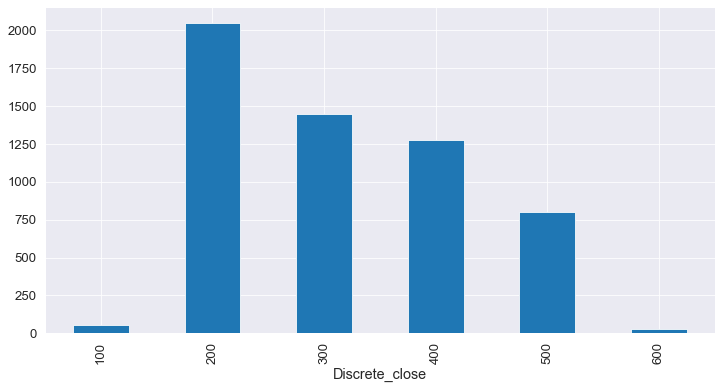

In [16]:
plt.figure(figsize=(12,6))
data.groupby('Discrete_close')['Discrete_close'].count().plot(kind='bar')

In [17]:
data['year'] = data.index.year

<AxesSubplot:>

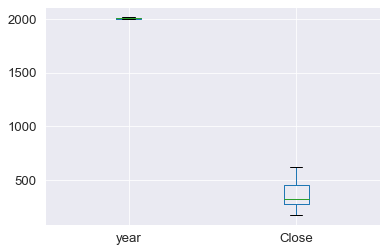

In [20]:
data[['year', 'Close']].plot(kind='box')

<AxesSubplot:xlabel='year', ylabel='Close'>

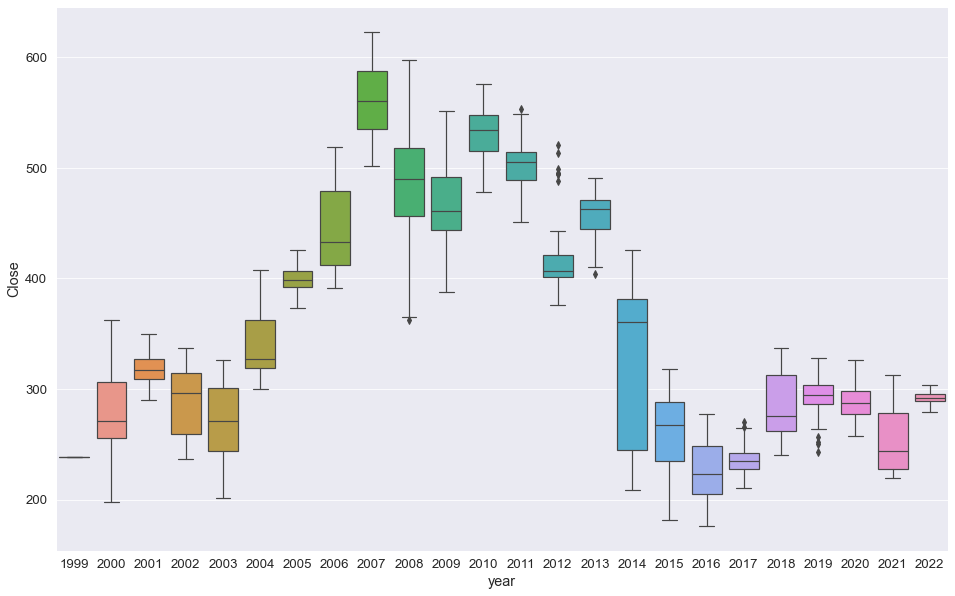

In [28]:
plt.figure(figsize=(16,10))
sns.boxplot(x='year', y='Close', data=data)

In [29]:
del data['Discrete_close']
del data['year']

In [30]:
for i in data.columns:
    df = data[data['{}'.format(i)] == 0]
    print(i, df.shape)

Open (0, 6)
High (0, 6)
Low (0, 6)
Close (0, 6)
Adj Close (0, 6)
Volume (77, 6)


## forward fill for the volume missing values

In [31]:
volumes = data['Volume'].tolist()

In [13]:
new_volume = []
for index, volume in enumerate(data['Volume']):
    final_volume = volume
    if volume == 0:
        x = volume
        second_index = 0
        while x == 0:
            x = volumes[index+second_index]
            second_index+=1
        final_volume = x
    new_volume.append(final_volume)

In [ ]:
0,0,100,150, 0, 200

In [ ]:
100, 100, 100, 150, 200, 200

In [14]:
data['new_volume'] = new_volume

In [15]:
for i in data.columns:
    df = data[data['{}'.format(i)] == 0]
    print(i, df.shape)

Open (0, 7)
High (0, 7)
Low (0, 7)
Close (0, 7)
Adj Close (0, 7)
Volume (77, 7)
new_volume (0, 7)


<AxesSubplot:>

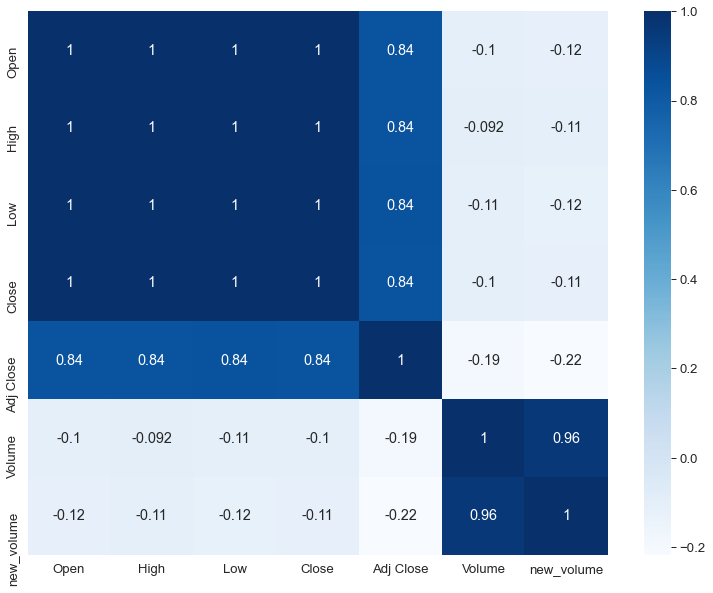

In [16]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),cmap='Blues',annot=True)

<AxesSubplot:xlabel='Date'>

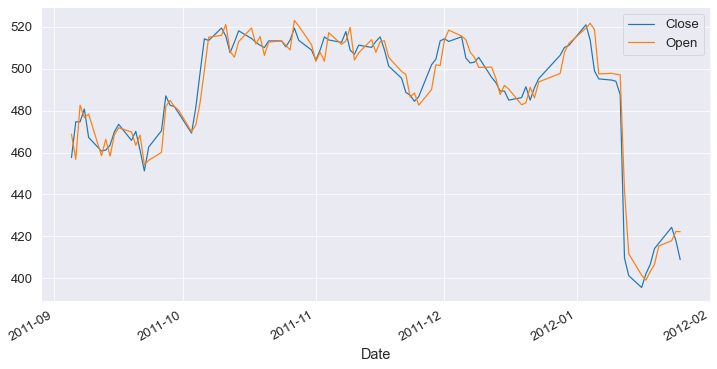

In [17]:
data[['Close','Open']].iloc[3000:3100,:].plot(legend=True, figsize = (12, 6))

<AxesSubplot:xlabel='Date'>

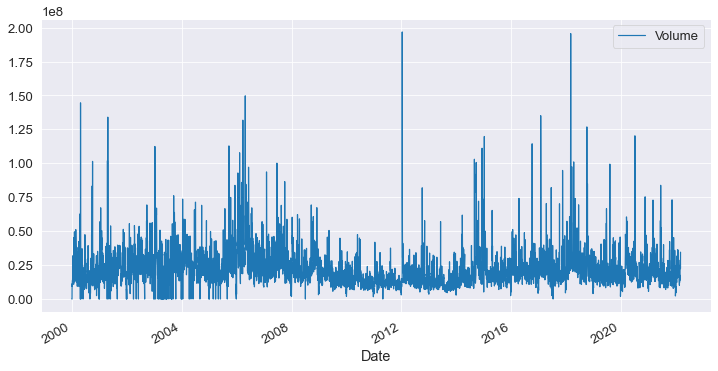

In [18]:
data['Volume'].plot(legend=True, figsize = (12, 6))

## Moving averages

In [19]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

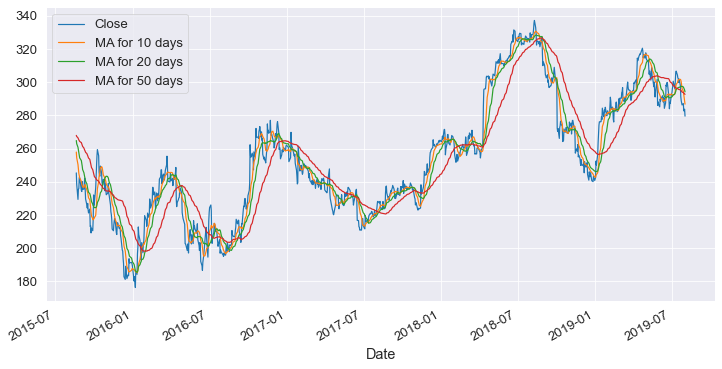

In [20]:
data[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].iloc[4000:5000,:].plot(subplots=False,figsize=(12,6))
plt.show()

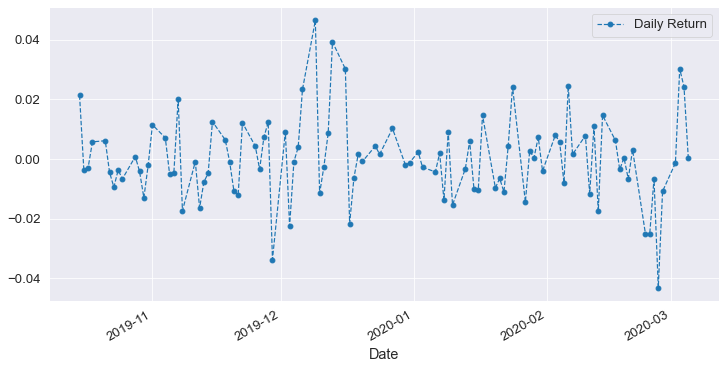

In [21]:
# use pct_change to find the percent change for each day
data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data.iloc[5050:5150,:]['Daily Return'].plot(figsize=(12,6),legend=True,linestyle='--',marker='o')
plt.show()

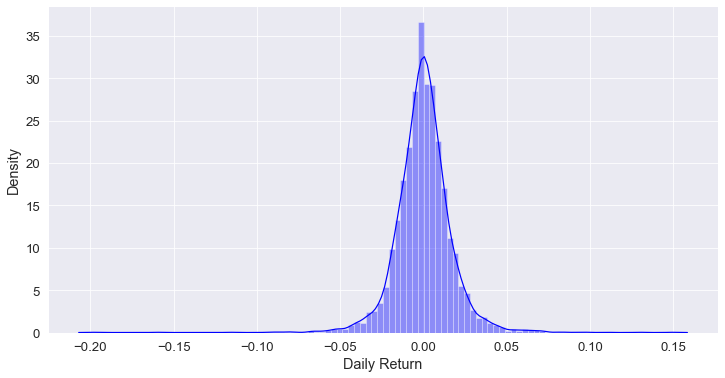

In [22]:
plt.figure(figsize=(12,6))
sns.distplot(data['Daily Return'].dropna(),bins=100,color='blue')
plt.show()

In [23]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'new_volume',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return'],
      dtype='object')

<Figure size 864x432 with 0 Axes>

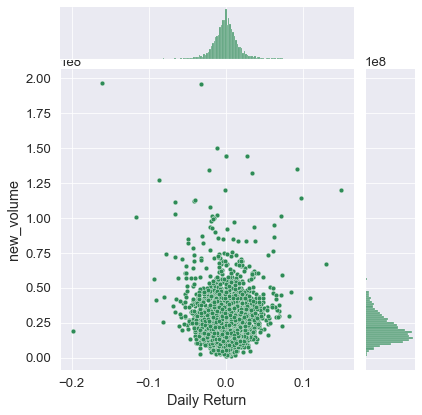

In [24]:
plt.figure(figsize=(12,6))
sns.jointplot('Daily Return','new_volume',data,kind='scatter',color='seagreen')
plt.show()

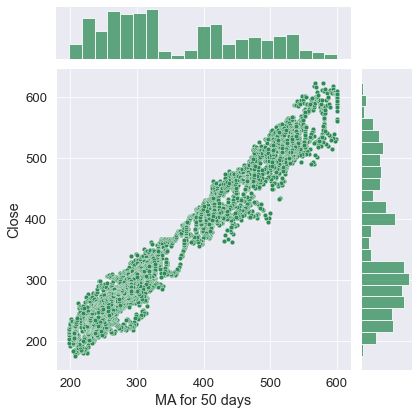

In [25]:
sns.jointplot('MA for 50 days','Close',data,kind='scatter',color='seagreen')
plt.show()

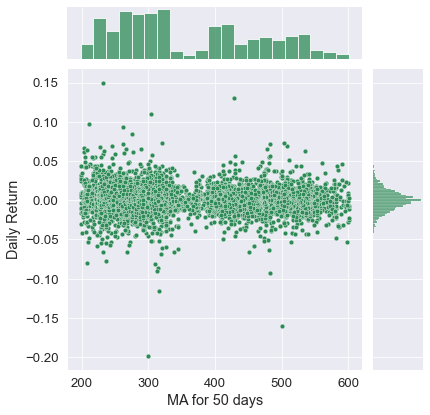

In [26]:
sns.jointplot('MA for 50 days','Daily Return',data,kind='scatter',color='seagreen')
plt.show()

<Figure size 864x432 with 0 Axes>

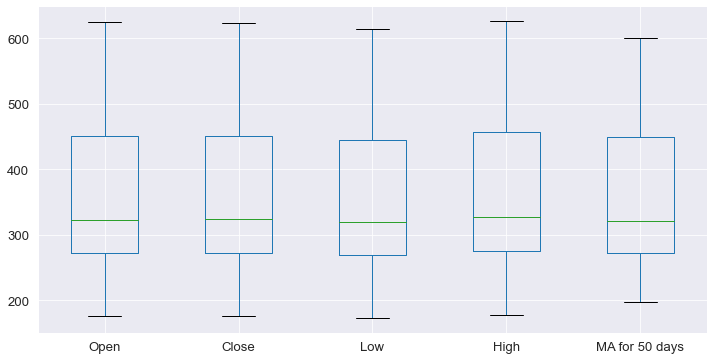

In [27]:
plt.figure(figsize=(12,6))
data[['Open', 'Close', 'Low', 'High','MA for 50 days']].plot(kind='box',figsize=(12,6))
plt.show()

In [28]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'new_volume',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return'],
      dtype='object')

## Select the three columns to be considered ["Open", "Close", "new_volume"]

In [29]:
df = data[["Open", "Close", "new_volume"]]

In [30]:
df

,Open,Close,new_volume
Date,,,
1999-12-31,238.4499,238.4499,11214410
2000-01-03,238.4499,238.4499,11214410
2000-01-04,239.3999,230.2165,11214410
2000-01-05,222.9332,234.0165,9228302
2000-01-06,234.0165,234.0165,11398336
...,...,...,...
2022-02-24,285.8500,279.6500,24807025
2022-02-25,280.3000,286.5500,22322138
2022-02-28,285.2500,289.7500,28809655


## Visualization of the data, open and close values

<AxesSubplot:xlabel='Date'>

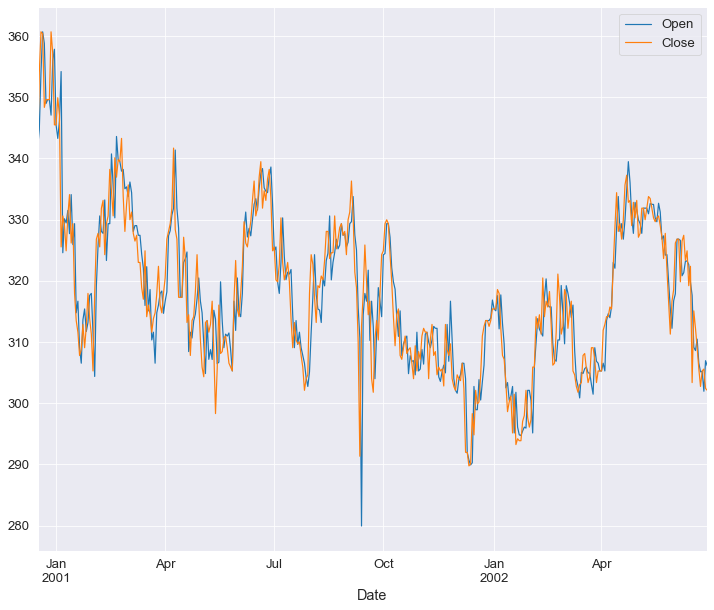

In [31]:
df.iloc[250:650,:2].plot(figsize=(12,10))

## Resampling to yearly mean

In [32]:
df_year = df.resample("Y").mean()

## Visualization of the yearly mean data

<AxesSubplot:xlabel='Date'>

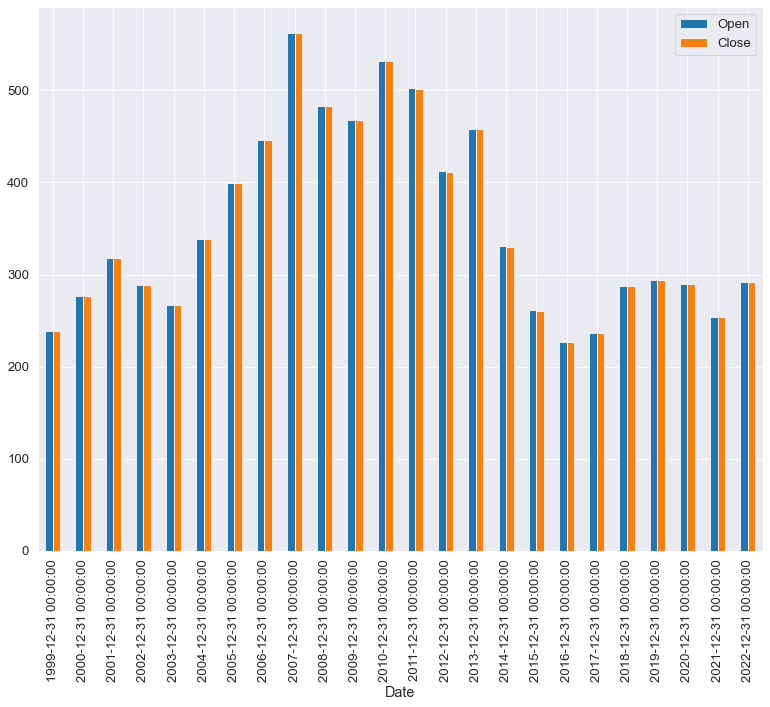

In [33]:
df_year.iloc[:,:2].plot(kind='bar', figsize=FIG_SIZE)

## Data Preprocessing

### Processing the features

In [37]:
def feature_processing(df, columns, scaler=False):
    '''
    index the dataframe by picking the first two columns and turn to numpy array
    initialize MinMax scaler 
    get the transform values of the data
    '''

    dataset = df.iloc[:,columns].values #numpy.ndarray
    
    if len(columns) == 1:
        dataset = np.reshape(dataset, (-1, 1))
    
    if scaler == False:
        scaler = MinMaxScaler(feature_range=(0, 1))
        dataset = scaler.fit_transform(dataset)
    else:
        dataset = scaler.transform(dataset)

    '''
    manual train test split
    using a ratio of 80%
    '''

    train_size = int(len(dataset) * 0.80)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    return train, test, scaler

In [38]:
train, test, scaler_x = feature_processing(df, [0,1])

train_x2, test_x2, scaler_x2 = feature_processing(df, [2])

### Processing the target variable

In [39]:
train_y, test_y, scaler_y = feature_processing(df, [1])

## Getting time steps

In [40]:
def create_dataset(features,target_data, look_back=1):
    '''
    function to create timesteps
    '''
    X, Y = [], []
    for i in range(len(features)-look_back-1):
        step = features[i:(i+look_back), :] 
        X.append(step)
        Y.append(target_data[i + look_back, 0])
    return np.array(X), np.array(Y)

In [41]:
'''
calling the create_dataset function to create the timesteps
'''
look_back = 5


In [42]:
'''
these function help prepare the timestep percentage increase or decrease
'''

def ratio_data(train_c, look_back, ratio=False):
    '''
    this function uses the timestep to compile the data for each timestep
    and it finds the percentage increase or decrease for each time step
    '''
    train_c_data = []
    for i in range(len(train_c)-look_back-1):
        train_c_data.append(train_c[i:(i+look_back), :])

    if ratio:
        ratios_train = [] 
        for i in train_c_data:
            diff = (i[-1] - i[0])/i[0]
            diff = diff*100
            ratios_train.append(diff)
        return ratios_train
    return np.array(train_c_data)
    

In [45]:
X_train, Y_train = create_dataset(train,train_y, look_back) 
X_test, Y_test = create_dataset(test,test_y, look_back)

volume_train = ratio_data(train_x2, look_back)
volume_test = ratio_data(test_x2, look_back)

In [46]:
X_train.shape

(4515, 5, 2)

In [47]:
volume_train.shape

(4515, 5, 1)

In [48]:
Y_train

array([0.12202386, 0.10572551, 0.08871872, ..., 0.13265312, 0.13392864,
       0.13761328])

In [49]:
Y_train.shape

(4515,)

In [50]:
df.iloc[:8,:]

,Open,Close,new_volume,End of week
Date,,,,
1999-12-31,238.4499,238.4499,11214410,end
2000-01-03,238.4499,238.4499,11214410,not end
2000-01-04,239.3999,230.2165,11214410,not end
2000-01-05,222.9332,234.0165,9228302,not end
2000-01-06,234.0165,234.0165,11398336,not end
2000-01-07,236.8665,230.8499,13505834,end
2000-01-10,232.1419,223.5665,14004877,not end
2000-01-11,227.9999,215.9665,18120152,not end


In [51]:
Y_test.shape

(1125,)

## Model initialization

In [52]:
volume_train.shape

(4515, 5, 1)

In [53]:
X_train.shape

(4515, 5, 2)

In [54]:
# X_train1.shape

In [ ]:
# A
input_a = Input(shape=(X_train.shape[1], X_train.shape[2]), name="A") 
y1 = Bidirectional(LSTM(100))(input_a)


# B
input_b = Input(shape=(volume_train.shape[1], volume_train.shape[2]), name="B") 
x1 = Bidirectional(LSTM(100))(input_b)


merge = concatenate([y1, x1])

# dense 1
dense1 = Dense(50)(merge)

# output
output_b = Dense(1)(dense1)

# model
model = Model(inputs=[input_a, input_b], outputs=output_b)

In [59]:
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
A (InputLayer)                  [(None, 5, 2)]       0                                            
__________________________________________________________________________________________________
B (InputLayer)                  [(None, 5, 1)]       0                                            
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 200)          82400       A[0][0]                          
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 200)          81600       B[0][0]                          
____________________________________________________________________________________________

In [65]:
model.compile(loss='mean_squared_error', optimizer='adam')

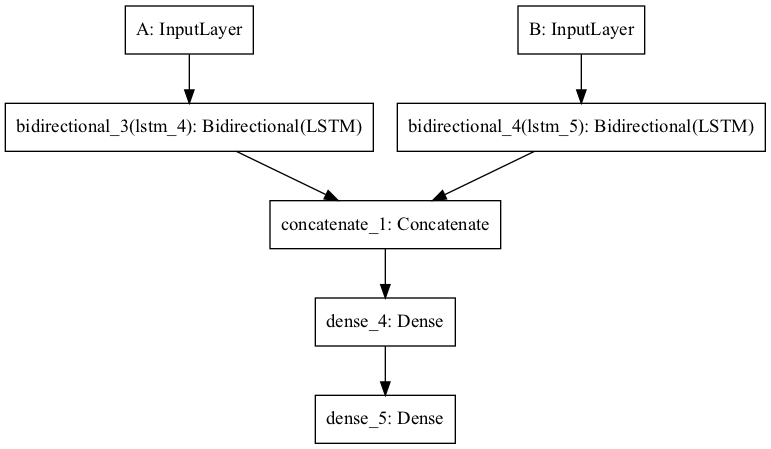

In [60]:
plot_model(model)

In [61]:
X_train

array([[[0.140096  , 0.13903068],
        [0.140096  , 0.13903068],
        [0.14221225, 0.12060649],
        [0.10553043, 0.12910987],
        [0.13021998, 0.12910987]],

       [[0.140096  , 0.13903068],
        [0.14221225, 0.12060649],
        [0.10553043, 0.12910987],
        [0.13021998, 0.12910987],
        [0.13656875, 0.12202386]],

       [[0.14221225, 0.12060649],
        [0.10553043, 0.12910987],
        [0.13021998, 0.12910987],
        [0.13656875, 0.12202386],
        [0.12604408, 0.10572551]],

       ...,

       [[0.12175499, 0.12244904],
        [0.12485895, 0.11819731],
        [0.11935668, 0.12443301],
        [0.12514097, 0.13081057],
        [0.13431147, 0.12896824]],

       [[0.12485895, 0.11819731],
        [0.11935668, 0.12443301],
        [0.12514097, 0.13081057],
        [0.13431147, 0.12896824],
        [0.12965572, 0.13265312]],

       [[0.11935668, 0.12443301],
        [0.12514097, 0.13081057],
        [0.13431147, 0.12896824],
        [0.12965572, 0.13

In [62]:
'''
model training parameters
'''
EPOCHS = 70
BATCH_SIZE = 10
VERBOSE = 1
SHUFFLE = False

In [63]:
Y_train

array([0.12202386, 0.10572551, 0.08871872, ..., 0.13265312, 0.13392864,
       0.13761328])

## Model training

In [66]:
'''
train model with already specified paramteres above
'''
history = model.fit([X_train, volume_train], Y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=([X_test, volume_test], Y_test), 
                    verbose=VERBOSE, 
                    shuffle=SHUFFLE)

Epoch 1/70
452/452 [==============================] - 7s 10ms/step - loss: 0.0012 - val_loss: 0.0105
Epoch 2/70
452/452 [==============================] - 3s 7ms/step - loss: 0.0012 - val_loss: 0.0099
Epoch 3/70
452/452 [==============================] - 3s 8ms/step - loss: 0.0013 - val_loss: 0.0059
Epoch 4/70
452/452 [==============================] - 3s 8ms/step - loss: 0.0013 - val_loss: 0.0042
Epoch 5/70
452/452 [==============================] - 4s 8ms/step - loss: 0.0013 - val_loss: 0.0034
Epoch 6/70
452/452 [==============================] - 3s 7ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 7/70
452/452 [==============================] - 3s 7ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 8/70
452/452 [==============================] - 3s 7ms/step - loss: 9.8991e-04 - val_loss: 0.0019
Epoch 9/70
452/452 [==============================] - 3s 7ms/step - loss: 8.1496e-04 - val_loss: 0.0014
Epoch 10/70
452/452 [==============================] - 3s 7ms/step - loss: 6.7266e-04 - val

## Visualization of training and test loss during training

### Graph for first experiment

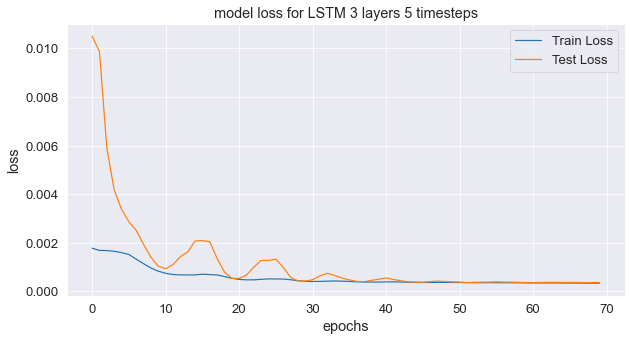

In [67]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss for LSTM 3 layers 5 timesteps')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

## Predictions

In [68]:
import time
start=time.time()

train_predict = model.predict([X_train,volume_train])
test_predict = model.predict([X_test,volume_test])

# invert predictions
train_predict = scaler_y.inverse_transform(train_predict)
Y_train = scaler_y.inverse_transform(Y_train.reshape(-1,1))

test_predict = scaler_y.inverse_transform(test_predict)
Y_test = scaler_y.inverse_transform(Y_test.reshape(-1,1))

end=time.time()
prediction_time=end-start
print(prediction_time)

1.2379016876220703


## Evaluations

### Evaluation for this experiment

In [69]:
print('Train Mean Absolute Error:', mean_absolute_error(Y_train, train_predict))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train, train_predict)))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test, test_predict))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test, test_predict)))

Train Mean Absolute Error: 23.806529234150055
Train Root Mean Squared Error: 29.950644031269412
Test Mean Absolute Error: 7.398981391059028
Test Root Mean Squared Error: 8.612473767199171


## Visualization of real price vs predicted price 

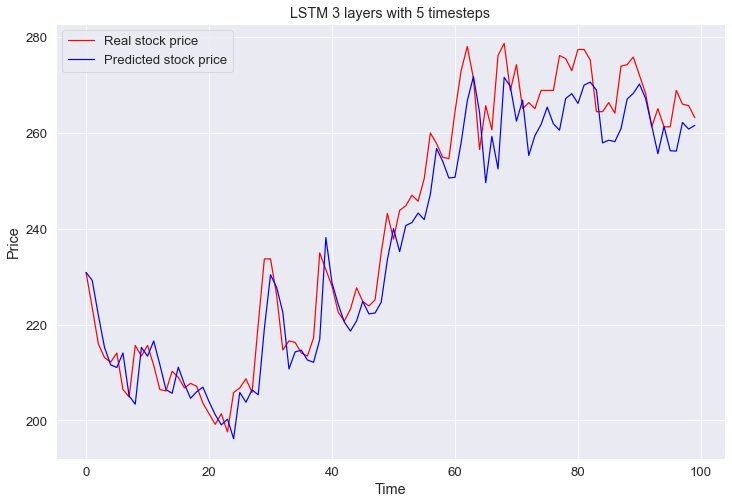

In [70]:
plt.figure(figsize=(12,8))
plt.plot(Y_train[:100], color = 'red', label = 'Real stock price')
plt.plot(train_predict[:100], color = 'blue', label = 'Predicted stock price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('LSTM 3 layers with 5 timesteps')
plt.legend()
plt.show()

## Test with entirely new data

### Fetch data

In [71]:
'''
set new start and end date
using the same ticker 
'''
start_date = '2022-03-04'
end_date = '2022-05-05'
'''
fetch new data with the specified parameters
'''

data = yf.download(ticker, start_date, end_date, interval="1d")


[*********************100%***********************]  1 of 1 completed


In [72]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-27,271.4000,274.5000,268.2000,273.6000,265.6830,18295919
2022-04-28,275.1000,275.2000,269.1000,272.3000,264.4206,13764025
2022-04-29,271.3000,275.1000,270.7570,272.0000,264.1293,19853422
2022-05-03,270.0000,277.4000,268.8000,276.7000,268.6933,32592907
2022-05-04,276.0000,277.9000,270.1000,271.7000,263.8380,14432045


### Select columns in contention

- I only want the Open and Close columns

In [73]:
'''
pick out the Open and Close columns in the dataset
'''
df = data[["Open", "Close", "Volume"]]

In [74]:
scaler_x

MinMaxScaler()

In [75]:
def feature_processing(df, columns, scaler=False):
    '''
    index the dataframe by picking the first two columns and turn to numpy array
    initialize MinMax scaler 
    get the transform values of the data
    '''

    dataset = df.iloc[:,columns].values #numpy.ndarray
    if len(columns) == 1:
        dataset = np.reshape(dataset, (-1, 1))
    dataset = scaler.transform(dataset)
#     if scaler:
#         dataset = scaler.transform(dataset)
#     else:
#         scaler_1 = MinMaxScaler(feature_range=(0, 1))
#         dataset = scaler_1.fit_transform(dataset)
        

    '''
    manual train test split
    using a ratio of 80%
    '''

    train_size = int(len(dataset) * 0.80)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    return train, test

In [76]:
train_new, test_new = feature_processing(df, [0,1], scaler_x) # feature
train_x2_new, test_x2_new = feature_processing(df, [2], scaler_x2) # volume
train_y_new, test_y_new = feature_processing(df, [1], scaler_y) # target

### get the ratio data

In [77]:
'''
perform the timesteps function
'''
look_back = 5
X_train_new, Y_train_new = create_dataset(train_new,train_y_new, look_back) 
X_test_new, Y_test_new = create_dataset(test_new,test_y_new, look_back) 

In [78]:
# train_new, test_new = ratio_preparation(df)
volume_train_new = ratio_data(train_x2_new, 5)
volume_test_new = ratio_data(test_x2_new, 5)

### Prediction

In [79]:
'''
perform a timed prediction
after the prediction, perform inverse transform to get the original prices
'''
start=time.time()

random_test = model.predict([X_train_new, volume_train_new])
# invert predictions
test_new_predict = scaler_y.inverse_transform(random_test)
Y_train_new = scaler_y.inverse_transform(Y_train_new.reshape(-1,1))

end=time.time()

prediction_time=end-start

print(prediction_time)

0.08632302284240723


### Visualization of the real stock price and the predicted stock price

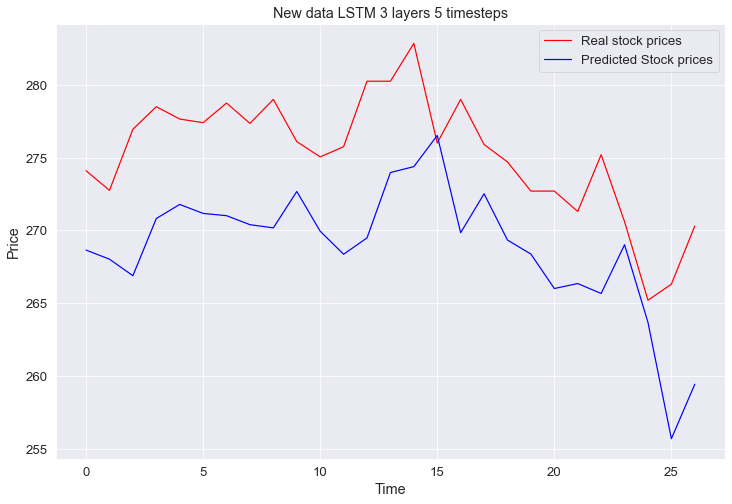

In [80]:
plt.figure(figsize=(12,8))
plt.plot(Y_train_new, color = 'red', label = 'Real stock prices')
plt.plot(test_new_predict, color = 'blue', label = 'Predicted Stock prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('New data LSTM 3 layers 5 timesteps')
plt.legend()
plt.show()

In [ ]:
data.shape

### Model evaluation with the new data

In [41]:
print('Test Mean Absolute Error:', mean_absolute_error(Y_train_new, test_new_predict))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train_new, test_new_predict)))

Test Mean Absolute Error: 7.62832585087529
Test Root Mean Squared Error: 8.16422785432372
